In [1]:
import os
import numpy as np
import pandas as pd
from astropy.wcs import WCS
from astropy.io import fits
import vaex
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
path_catalog = os.path.join(os.environ['CATSPATH'],'HETDEX')
file_catalog = 'source_catalog_3.0.1.fits'
file_footprint = 'hdr3.0.1_fibercoverage_fall.hdf5'

In [3]:
print(os.path.isdir(path_catalog))
print(os.path.isfile(os.path.join(path_catalog,file_catalog)))

True
True


In [4]:
df = vaex.open(os.path.join(path_catalog,file_catalog))

In [5]:
len(df)

1650039

In [6]:
sn_cut = 5.2

max_ra_hers = 36.2
min_ra_hers = 13.4
max_dec_hers = 2.4
min_dec_hers = -2.4

max_ra_helms = 36.2
min_ra_helms = 348
max_dec_helms = 9.5
min_dec_helms = -9.5

In [7]:
idx_cut_hers = (df['flag_best'] == 1) & (df['sn'] > sn_cut) \
& ((df['ra'] > min_ra_hers) & (df['ra'] < max_ra_hers)) \
& ((df['dec'] > min_dec_hers) & (df['dec'] < max_dec_hers)) 

In [8]:
idx_cut_helms = (df['flag_best'] == 1) & (df['sn'] > sn_cut) \
& ((df['ra'] > min_ra_helms) | (df['ra'] < max_ra_helms)) \
& ((df['dec'] > min_dec_helms) & (df['dec'] < max_dec_helms)) 

In [8]:
df_hers = df[idx_cut_hers]

In [9]:
df_hers['source_type'] = df_hers['source_type'].apply(lambda x: x.decode('utf-8')) 

In [10]:
df_hers_cut = df_hers[(df_hers['source_type'] == 'lae') | (df_hers['source_type'] == 'agn')]

In [11]:
len(df_hers_cut)

42259

In [13]:
df_helms = df[idx_cut_helms]

In [14]:
df_helms['source_type'] = df_helms['source_type'].apply(lambda x: x.decode('utf-8')) 

In [15]:
df_helms_cut = df_helms[(df_helms['source_type'] == 'lae') | (df_helms['source_type'] == 'agn')]

In [16]:
print(len(df_hers_cut))
print(len(df_helms_cut))

44588
56395


In [105]:
df.column_names

['source_id',
 'source_name',
 'detectid',
 'n_members',
 'lum',
 'ra_mean',
 'dec_mean',
 'icz',
 'ixx',
 'iyy',
 'ixy',
 'izz',
 'a',
 'b',
 'pa',
 'a2',
 'b2',
 'pa2',
 'wave_group_id',
 'wave_group_a',
 'wave_group_b',
 'wave_group_pa',
 'wave_group_ra',
 'wave_group_dec',
 'wave_group_wave',
 'z_agn',
 'agn_vis_class',
 'fwhm',
 'throughput',
 'fluxlimit_4540',
 'shotid',
 'field',
 'n_ifu',
 'ra',
 'dec',
 'date',
 'obsid',
 'wave',
 'wave_err',
 'flux',
 'flux_err',
 'linewidth',
 'linewidth_err',
 'continuum',
 'continuum_err',
 'sn',
 'sn_err',
 'chi2',
 'chi2_err',
 'multiframe',
 'fibnum',
 'x_raw',
 'y_raw',
 'amp',
 'chi2fib',
 'expnum',
 'fiber_id',
 'ifuid',
 'ifuslot',
 'inputid',
 'noise_ratio',
 'specid',
 'weight',
 'x_ifu',
 'y_ifu',
 'det_type',
 'gmag',
 'plya_classification',
 'z_elixer',
 'best_pz',
 'combined_plae',
 'combined_plae_lo',
 'combined_plae_hi',
 'flags',
 'classification_labels',
 'counterpart_ra',
 'counterpart_dec',
 'counterpart_mag',
 'counterp

In [12]:
columns_keep=['ra','dec','sn','zspec','z_hetdex','lum','lum_lya','lum_oii','Av','flux']

In [13]:
df_hers_keep = df_hers_cut[columns_keep]

In [20]:
df_helms_keep = df_helms_cut[columns_keep]

In [21]:
df_helms_keep

#,ra,dec,sn,zspec,z_hetdex,lum,lum_lya,lum_oii,Av,flux
0,20.53993,0.244862,5.38,nan,2.4957923889160156,89619.73,1.180687992796691e+43,0.0,0.09266784,22.716238
1,20.545244,0.253239,5.25,nan,2.6540095806121826,96509.29,9.414193659373274e+42,0.0,0.092467636,15.612694
2,20.52413,0.164465,5.86,nan,2.5198941230773926,82966.414,1.4108146888730188e+43,0.0,0.093211666,26.520027
3,20.510782,0.207167,5.41,nan,2.166813373565674,90769.516,1.4283920937239683e+43,0.0,0.092635475,38.727
4,20.554785,0.153625,5.48,nan,2.7243826389312744,90769.516,1.124965691960465e+43,0.0,0.09452346,17.515425
...,...,...,...,...,...,...,...,...,...,...
"56,390",8.662994,-1.605137,5.66,nan,1.9661749601364136,187024.66,6.491128583892634e+42,0.0,0.071481675,22.302742
"56,391",8.665262,-1.764491,5.89,nan,2.4444215297698975,92760.0,6.441751301978219e+42,0.0,0.076801024,13.033772
"56,392",8.725013,-1.751958,5.45,nan,2.0304934978485107,88650.69,4.661958532367357e+42,0.0,0.07412108,14.807726
"56,393",8.717047,-1.779631,9.7,nan,2.124589681625366,191343.31,1.1736372805857688e+43,0.0,0.07601444,33.381443


In [14]:
df_foot = vaex.open(os.path.join(path_catalog,file_footprint))

In [15]:
idx_cut_hers_foot = ((df_foot['ra'] > min_ra_hers) & (df_foot['ra'] < max_ra_hers)) \
& ((df_foot['dec'] > min_dec_hers) & (df_foot['dec'] < max_dec_hers)) 

In [24]:
idx_cut_helms_foot = ((df_foot['ra'] > min_ra_helms) | (df_foot['ra'] < max_ra_helms)) \
& ((df_foot['dec'] > min_dec_helms) & (df_foot['dec'] < max_dec_helms)) 

In [22]:
df_hers_foot = df_foot[idx_cut_hers_foot]

In [23]:
df_hers_foot

#,multiframe,ra,dec,fiber_id,healpix,amp,date,datevobs,expnum,fibidx,fibnum,fpx,fpy,ifuid,ifuslot,ifux,ifuy,shotid,specid,flag,amp_flag,meteor_flag,gal_flag
0,--,20.229696,-0.1810548,--,6462840005,--,20180810,--,1,0,1,-37.83,337.11,--,--,11.44,-13.22,20180810010,--,84,84,84,84
1,--,20.229395,-0.1804172,--,6462708933,--,20180810,--,1,1,2,-40.37,337.11,--,--,8.9,-13.22,20180810010,--,84,84,84,84
2,--,20.229094,-0.1797797,--,6462577861,--,20180810,--,1,2,3,-42.91,337.11,--,--,6.36,-13.22,20180810010,--,84,84,84,84
3,--,20.22879,-0.1791396,--,6462446789,--,20180810,--,1,3,4,-45.46,337.11,--,--,3.81,-13.22,20180810010,--,84,84,84,84
4,--,20.228487,-0.178502,--,6462446789,--,20180810,--,1,4,5,-48.0,337.11,--,--,1.27,-13.22,20180810010,--,84,84,84,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"64,464,991",--,13.987807,-0.1142629,--,6455235556,--,20180113,--,2,107,108,275.345,-363.89,--,--,24.15,-13.22,20180113006,--,84,84,84,84
"64,464,992",--,13.988149,-0.1136452,--,6455104485,--,20180113,--,2,108,109,272.805,-363.89,--,--,21.61,-13.22,20180113006,--,84,84,84,84
"64,464,993",--,13.988489,-0.1130275,--,6455104485,--,20180113,--,2,109,110,270.265,-363.89,--,--,19.07,-13.22,20180113006,--,84,84,84,84
"64,464,994",--,13.988831,-0.1124098,--,6455104485,--,20180113,--,2,110,111,267.725,-363.89,--,--,16.53,-13.22,20180113006,--,84,84,84,84


In [27]:
df_helms_foot = df_foot[idx_cut_helms_foot]

In [24]:
print(len(df_hers_foot))
print(len(df_helms_foot))

64464996


NameError: name 'df_helms_foot' is not defined

In [25]:
hers_maps = {'PSW':'hers-act_SANEPIC_PSW_20121012',
             'PMW':'hers-act_SANEPIC_PMW_20121012',
             'PLW':'hers-act_SANEPIC_PLW_20121012'
            }
helms_maps = {'PSW':'HeLMS_PSW_SANEPIC_v0.3',
              'PMW':'HeLMS_PLW_SANEPIC_v0.3',
              'PLW':'HeLMS_PMW_SANEPIC_v0.3'
             }

In [17]:
class MapObject():
    maps={}
    masks={}
    headers={}
    pix_sizes_arcsec={}
    def __init__(self, base_path, map_dict, crop=False, l20=None, hanning=False):
        
        for key, map_name in map_dict.items():
            map_path = os.path.join(base_path, map_name+'.fits')
            try:
                map_in, hd_in = fits.getdata(map_path, 0, header=True)
            except:
                map_in, hd_in = fits.getdata(map_path, 1, header=True)
            try:
                pix_arcsec = hd_in['CDELT2']*3600
            except:
                pix_arcsec = hd_in['CD2_2']*3600
            print(key)
            print(pix_arcsec)
            
            if crop:
                cx=crop
                cy=crop
                dims0 = np.shape(map_in)
                map_in=map_in[dims0[0]//2-cx//2:dims0[0]//2+cx//2,dims0[1]//2-cy//2:dims0[1]//2+cy//2]
                
            dims = np.shape(map_in)
            print(dims)
            self.headers[key] = hd_in
            self.pix_sizes_arcsec[key] = pix_arcsec
            
            # Hanning Mask
            window2d = np.sqrt(np.outer(np.abs(np.hanning(dims[0])),np.abs(np.hanning(dims[1]))))
            mask_in=np.ones_like(map_in)
            mask_in[np.isnan(map_in)]=0
            if hanning:
                mask_in*=window2d
            map_in[np.isnan(map_in)]=0
            
            if l20:
                self.maps[key] = np.zeros([l20,l20])
                self.maps[key][:dims[0],:dims[1]] = map_in
                self.masks[key] = np.zeros([l20,l20])
                self.masks[key][:dims[0],:dims[1]] = mask_in
            else:
                self.maps[key] = map_in
                self.masks[key] = mask_in

In [18]:
path_hers_maps = os.path.join(os.environ['MAPSPATH'],'Herschel','Hers')
#hers_obj = CrossMapObject(path_hers_maps, hers_maps)
hers_obj = MapObject(path_hers_maps, hers_maps)

PSW
7.425000000000001
(2252, 10989)
PMW
9.899999999999999
(1694, 8244)
PLW
14.850000000000001
(1130, 5497)


In [60]:
100/(14.85/60)

404.04040404040404

In [45]:
path_helms_maps = os.path.join(os.environ['MAPSPATH'],'Herschel','HeLMS')
#helms_obj = CrossMapObject(path_helms_maps, helms_maps)
helms_obj = MapObject(path_helms_maps, helms_maps)

In [19]:
ra_hers = df_hers['ra'].values
dec_hers = df_hers['dec'].values
print(len(ra_hers))

122364


In [52]:
ra_helms = df_helms['ra'].values
dec_helms = df_helms['dec'].values
print(len(ra_helms))

163818


In [26]:
footprint_ra_hers = df_hers_foot['ra'].values
footprint_dec_hers = df_hers_foot['dec'].values

In [46]:
footprint_ra_helms = df_helms_foot['ra'].values
footprint_dec_helms = df_helms_foot['dec'].values

In [31]:
wv = 'PLW'
hd_hers = hers_obj.headers[wv]
wmap = WCS(hd_hers)
footprint_hers = np.zeros_like(hers_obj.masks[wv])
cms=footprint_hers.shape
# CONVERT FROM RA/DEC to X/Y
ty, tx = wmap.wcs_world2pix(footprint_ra_hers, footprint_dec_hers, 0)
# CHECK FOR SOURCES THAT FALL OUTSIDE MAP
ind_keep = np.where((tx >= 0) & (np.round(tx) < cms[0]) & (ty >= 0) & (np.round(ty) < cms[1]))
real_x = np.round(tx[ind_keep]).astype(int)
real_y = np.round(ty[ind_keep]).astype(int)
footprint_hers[real_x, real_y] += 1

In [69]:
np.sum(real_x==0)

7453

In [47]:
wv = 'PLW'
hd_helms = helms_obj.headers[wv]
wmap = WCS(hd_helms)
footprint_helms = np.zeros_like(helms_obj.masks[wv])
cms=footprint_helms.shape
# CONVERT FROM RA/DEC to X/Y
ty, tx = wmap.wcs_world2pix(footprint_ra_helms, footprint_dec_helms, 0)
# CHECK FOR SOURCES THAT FALL OUTSIDE MAP
ind_keep = np.where((tx >= 0) & (np.round(tx) < cms[0]) & (ty >= 0) & (np.round(ty) < cms[1]))
real_x = np.round(tx[ind_keep]).astype(int)
real_y = np.round(ty[ind_keep]).astype(int)
footprint_helms[real_x, real_y] += 1

In [74]:
wv = 'PLW'
hd_hers = hers_obj.headers[wv]
wmap = WCS(hd_hers)
mask_hers = np.zeros_like(hers_obj.masks[wv])
cms=mask_hers.shape
# CONVERT FROM RA/DEC to X/Y
ty, tx = wmap.wcs_world2pix(ra_hers, dec_hers, 0)
# CHECK FOR SOURCES THAT FALL OUTSIDE MAP
ind_keep = np.where((tx >= 0) & (np.round(tx) < cms[0]) & (ty >= 0) & (np.round(ty) < cms[1]))
real_x = np.round(tx[ind_keep]).astype(int)
real_y = np.round(ty[ind_keep]).astype(int)
mask_hers[real_x, real_y] += 1

In [55]:
wv = 'PLW'
hd_helms = helms_obj.headers[wv]
wmap = WCS(hd_helms)
mask_helms = np.zeros_like(helms_obj.masks[wv])
cms=mask_helms.shape
# CONVERT FROM RA/DEC to X/Y
ty, tx = wmap.wcs_world2pix(ra_helms, dec_helms, 0)
# CHECK FOR SOURCES THAT FALL OUTSIDE MAP
ind_keep = np.where((tx >= 0) & (np.round(tx) < cms[0]) & (ty >= 0) & (np.round(ty) < cms[1]))
real_x = np.round(tx[ind_keep]).astype(int)
real_y = np.round(ty[ind_keep]).astype(int)
mask_helms[real_x, real_y] += 1

In [32]:
plt.imshow(mask_hers);

NameError: name 'mask_hers' is not defined

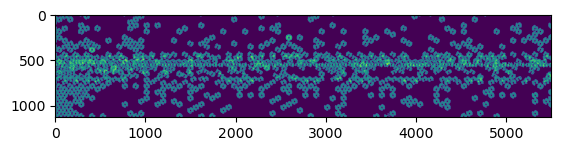

In [33]:
plt.imshow(footprint_hers);

In [ ]:
np.sum(mask[mask > 0])

In [ ]:
np.sum(footprint[footprint > 0])

In [27]:
def write_fits(mapin,
               headerin,
               map_name,
               path_map=r'/Users/mviero/Desktop', 
               prefix=None,
               suffix='',\
               overwrite=True, 
               show=False):
    
    if show:
        plt.imshow(mapin)

    if prefix is not None:
        name_map = '_'.join(['_'.join([prefix,str(map_name)]),suffix])+'.fits'
    else:
        name_map = '_'.join([str(map_name),suffix])+'.fits'
    print(mapin.shape)
    print(headerin)
    hdu = fits.PrimaryHDU(mapin, header=headerin)
    hdul = fits.HDUList([hdu])
    hdul.writeto(os.path.join(path_map, name_map),overwrite=overwrite)
    print('{0} written to {1}'.format(name_map,path_map))

In [28]:
def get_footprint(mask, hd, ra, dec):
    wmap = WCS(hd)
    footprint = np.zeros_like(mask)
    cms=footprint.shape
    print(cms)
    # CONVERT FROM RA/DEC to X/Y
    ty, tx = wmap.wcs_world2pix(ra, dec, 0)
    # CHECK FOR SOURCES THAT FALL OUTSIDE MAP
    ind_keep = np.where((tx >= 0) & (np.round(tx) < cms[0]) & (ty >= 0) & (np.round(ty) < cms[1]))
    real_x = np.round(tx[ind_keep]).astype(int)
    real_y = np.round(ty[ind_keep]).astype(int)
    footprint[real_x, real_y] += 1
    return footprint

In [29]:
path_write_footprint='D:\maps\cutouts\layers\hetdex_footprint_mask'

In [30]:
wvs=['PSW','PMW','PLW']
for wv in wvs:
    hd_wv = hers_obj.headers[wv]
    ra = df_hers_foot['ra'].values
    dec = df_hers_foot['dec'].values
    mask = np.zeros_like(hers_obj.maps[wv])
    print(np.shape(mask))
    wmap = WCS(hd_wv)
    footprint_wv = get_footprint(mask, hd_wv, ra, dec)
    write_fits(footprint_wv, hd_wv, map_name=hers_maps[wv], path_map=path_write_footprint, suffix='footprint')

(2252, 10989)
(2252, 10989)


(2252, 10989)
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -64 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                10989 / length of data axis 1                          NAXIS2  =                 2252 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =        17546.9613759 / Pixel coordinate of reference point            CRPIX2  =        1098.17606437 / Pixel coordinate of reference point            CDELT1  =           -0.0020625 / [deg] Coordinate increment at reference point  CDELT2  =            0.0020625 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'           

(1130, 5497)
(1130, 5497)
(1130, 5497)
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -64 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 5497 / length of data axis 1                          NAXIS2  =                 1130 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =        8774.69431351 / Pixel coordinate of reference point            CRPIX2  =        551.842636062 / Pixel coordinate of reference point            CDELT1  =            -0.004125 / [deg] Coordinate increment at reference point  CDELT2  =             0.004125 / [deg] Coordinate increment at reference point  C

In [43]:
import reproject

In [57]:
import pdb
from reproject import reproject_from_healpix, reproject_to_healpix
def write_healpix(mapin,
               headerin,
               map_name,
               projection='galactic',                
               path_map=r'/Users/mviero/Desktop', 
               prefix=None,
               suffix='healpix',
               overwrite=True):
    
    whd = WCS(headerin)
    array, footprint = reproject_to_healpix((mapin, whd), projection, nside=128)
    pdb.set_trace()

In [58]:
write_healpix(hers_obj.maps['PLW'], hers_obj.headers['PLW'], 'mapname')

--Return--
None
> /var/folders/y6/w9q_b49n5qzbxrbqfjs4qkpm0000gn/T/ipykernel_88734/2712066923.py(14)write_healpix()
     10                overwrite=True):
     11 
     12     whd = WCS(headerin)
     13     array, footprint = reproject_to_healpix((mapin, whd), projection, nside=128)
---> 14     pdb.set_trace()

ipdb> c
